# Import Library

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

# 作業: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

## 1. MSE

In [23]:
## MSE
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [25]:
train_history =model.fit(x=x_img_train_normalize,
                         y=y_label_train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 671s 17ms/step - loss: 0.0900 - acc: 0.1150 - val_loss: 0.0896 - val_acc: 0.1495
Epoch 2/10
40000/40000 [==============================] - 684s 17ms/step - loss: 0.0895 - acc: 0.1371 - val_loss: 0.0893 - val_acc: 0.1842
Epoch 3/10
40000/40000 [==============================] - 680s 17ms/step - loss: 0.0889 - acc: 0.1602 - val_loss: 0.0889 - val_acc: 0.2084
Epoch 4/10
40000/40000 [==============================] - 686s 17ms/step - loss: 0.0884 - acc: 0.1800 - val_loss: 0.0883 - val_acc: 0.2259
Epoch 5/10
40000/40000 [==============================] - 700s 17ms/step - loss: 0.0876 - acc: 0.1962 - val_loss: 0.0877 - val_acc: 0.2417
Epoch 6/10
40000/40000 [==============================] - 654s 16ms/step - loss: 0.0866 - acc: 0.2167 - val_loss: 0.0869 - val_acc: 0.2638
Epoch 7/10
40000/40000 [==============================] - 654s 16ms/step - loss: 0.0856 - acc: 0.2347 - val_loss: 0.

In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

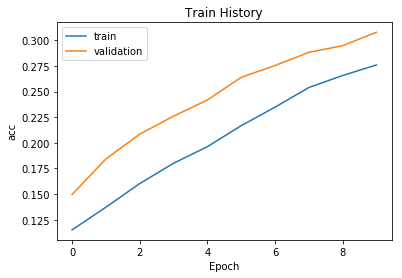

In [27]:
show_train_history(train_history,'acc','val_acc')

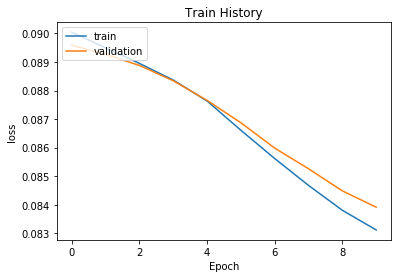

In [28]:
show_train_history(train_history,'loss','val_loss')

In [29]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 6s 617us/step

accuracy= 0.3124


## 2. Binary_crossentropy

In [30]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [31]:
train_history =model.fit(x=x_img_train_normalize,
                         y=y_label_train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 651s 16ms/step - loss: 0.2870 - acc: 0.9010 - val_loss: 0.2881 - val_acc: 0.9002
Epoch 2/10
40000/40000 [==============================] - 653s 16ms/step - loss: 0.2794 - acc: 0.9015 - val_loss: 0.2815 - val_acc: 0.9003
Epoch 3/10
40000/40000 [==============================] - 656s 16ms/step - loss: 0.2721 - acc: 0.9024 - val_loss: 0.2756 - val_acc: 0.9004
Epoch 4/10
40000/40000 [==============================] - 657s 16ms/step - loss: 0.2641 - acc: 0.9035 - val_loss: 0.2689 - val_acc: 0.9006
Epoch 5/10
40000/40000 [==============================] - 657s 16ms/step - loss: 0.2573 - acc: 0.9050 - val_loss: 0.2627 - val_acc: 0.9009
Epoch 6/10
40000/40000 [==============================] - 657s 16ms/step - loss: 0.2508 - acc: 0.9061 - val_loss: 0.2562 - val_acc: 0.9020
Epoch 7/10
40000/40000 [==============================] - 658s 16ms/step - loss: 0.2459 - acc: 0.9073 - val_loss: 0.

In [32]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

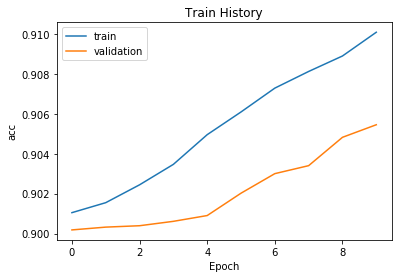

In [33]:
show_train_history(train_history,'acc','val_acc')

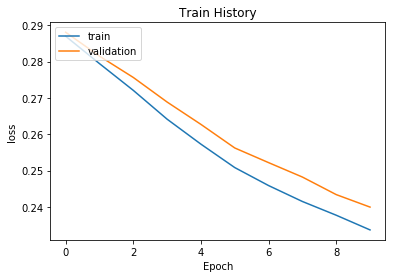

In [34]:
show_train_history(train_history,'loss','val_loss')

In [35]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 6s 650us/step

accuracy= 0.9057899795532226


binary_crossentropy當損失函數表現較佳(約0.9)，MSE的準確度只有0.3左右。